In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit

# 1. Analyze Data 1 and Data 2 using linear regression
(a) Plot J(w) against iteration.
(b) Plot J(w) against w obtained in each iteration for Data 1.
(c) Plot the hyperplane that generates the data.
(d) Describe the experimental procedures used.
(e) Report the parameters of the model.

Parameters of the model are [1.8044314  4.49851511]
Wall time: 14.1 s


(201200, 1)

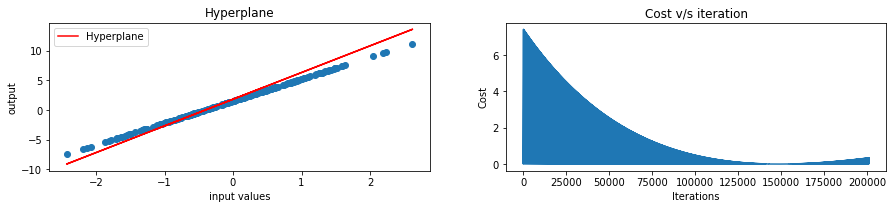

In [6]:
%%time

data1 = pd.read_excel('data1.xlsx')

data1.head()
x=data1.iloc[:,0]
y=data1.iloc[:,1]
x=pd.DataFrame(x)
x=np.array(x)
ones=np.ones((200,1))
x1=np.append(ones,x,axis=1)
y=np.array(y)
w1=[]
t=[]

# cost function

def cost(data,w):
    total_cost=0
    for i in range(200):
        total_cost+=(1/400)*((data[i]*w).sum()-y[i])**2
        t.append(total_cost)
    return total_cost

# gradient descent

def grd(data,w,alpha,iterate):
    for i in range(iterate):
        s=np.zeros(2)
        for j in range(200):
            for k in range(2):
                s[k]+=(1/200)*(np.sum((data[j]*w)-y[j])*data[j][k])
        w=w-alpha*s
        w1.append(w)
        #print(cost(data,w))
        t1=cost(data,w)
        t.append(t1)
    
    return w
                            
w=np.zeros(2)
alpha=0.001
iterate=1000
 
w=(grd(x1,w,alpha,iterate))

print('Parameters of the model are',w)
total_cost=cost(x1,w)
#plt.scatter(x,y)
w=pd.DataFrame(w)
w=np.array(w)
y_pred=(x1.dot(w))
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
plt.scatter(x,y)
plt.plot(x,y_pred,'r',label='Hyperplane')
plt.title('Hyperplane')
plt.xlabel('input values')
plt.ylabel('output')
plt.legend()
#plt.show()
plt.subplot(2,2,2)
plt.plot(t)
plt.title('Cost v/s iteration')
plt.xlabel('Iterations')
plt.ylabel('Cost')

w1=np.array(w1)
w1.shape
t=pd.DataFrame(t)
t=np.array(t)
t.shape

#plt.subplot(3,3,3)


Text(0.5, 0.92, 'cost v/s parameter')

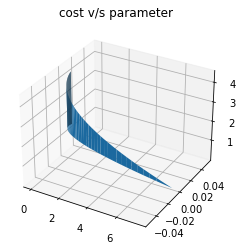

In [4]:
ax=plt.axes(projection="3d")

ax.plot_surface(t,0,w1)
plt.title('cost v/s parameter')

#ax.scatter(x,y)
#ax.plot3D(t,y_pred,'r-')

array([1.49999458, 3.6999956 ])

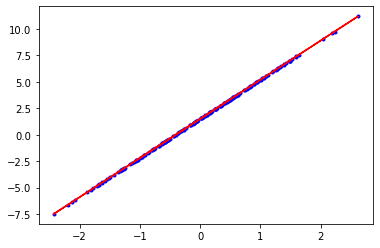

In [95]:
# using Direct method

x=pd.DataFrame(data1['x'])
x
iterate =1000
alpha= 0.1
N=x.shape[0]
ones = np.ones((N,1))
x1 =np.concatenate((ones,x),axis=1)

n= x.shape[1]
w = np.ones(n)
h = np.dot(x,w)


plt.plot(x,y,"b.")
lm= np.linalg.inv(x1.T.dot(x1)).dot(x1.T).dot(y)
lm
y1=x1.dot(lm)
y1
plt.plot(x,y1,"r-")
cost=[]
iterate=1000
lm
    

parameters of model
 [-3.67609966e-04 -2.18681463e+00  1.60169420e-02]


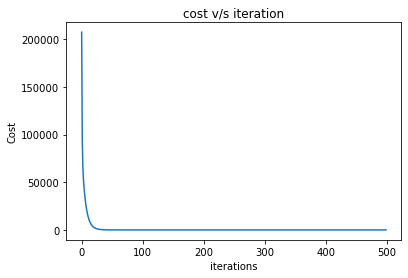

In [5]:
data2 = pd.read_excel('data2.xlsx')
data2.head()


x2=data2.iloc[:,:2]
y2=data2.iloc[:,-1]
x2=pd.DataFrame(x2)
x2=np.array(x2)
ones=np.ones((200,1))
x2_new=np.append(ones,x2,axis=1)
y2=np.array(y2)
w2_new=[]
t2_new=[]

def cost(data,w):
    total_cost=0
    for i in range(200):
        total_cost+=(1/400)*((data[i]*w).sum()-y2[i])**2
        #t.append(total_cost)
    return total_cost

# gradient descent

def grd(data,w,alpha,iterate):
    for i in range(iterate):
        s=np.zeros(3)
        for j in range(200):
            for k in range(3):
                s[k]+=(1/200)*((data[j]*w).sum()-y2[j])*data[j][k]
        w=w-alpha*s
        w2_new.append(w)
        #print(cost(data,w))
        t2=cost(data,w)
        t2_new.append(t2)
   
    return w
        
w2=np.zeros(3)
alpha=0.000001
iterate=500
w2=(grd(x2_new,w2,alpha,iterate))
plt.plot(t2_new)
y2_pred=x2_new.dot(w2)
plt.title('cost v/s iteration')
plt.xlabel('iterations')
plt.ylabel('Cost')
print('parameters of model\n',w2)

Text(0.5, 0.92, 'plot of hyperplane')

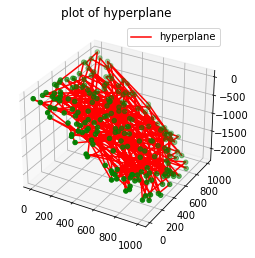

In [33]:
ax=plt.axes(projection='3d')
ax.scatter(x2[:,0],x2[:,1],y2,color='g')
#ax.plot_surface(y2_pred,0,x2)
ax.plot3D(x2[:,0],x2[:,1],y2_pred,color='r',label='hyperplane')
plt.legend()
plt.title('plot of hyperplane')

# 2. Analyze Data 3 using linear regression
#(a) Find the parameters using direct method and iterative methods.
#(b) Compare the time taken and space requirements of two approaches.
#(c) Describe the experimental procedures used.
#(d) Report the values of the hyperparameters and parameters of the model.
#(e) Analyze the performance of the model.

In [46]:
%%time

data3=pd.read_excel('data3.xlsx')
data3.head()

x3=data3.iloc[:,0:50]
x3=np.array(x3)
y3=data3.iloc[:,-1]
N3=x3.shape[0]  # number of data points

# inputting x0=1 in the first entry of all rows

ones = np.ones((N3,1))  
x3_1 =np.concatenate((ones,x3),axis=1)

# calculating the values of parameters by direct method

lm3= np.linalg.inv(x3_1.T.dot(x3_1)).dot(x3_1.T).dot(y3)

print('Parameters obtained from direct method :\n',lm3)

Parameters obtained from direct method :
 [1.17499365e-04 3.00012352e+00 1.30002413e+01 4.00006608e+00
 7.99989876e+00 1.10001828e+01 1.79999616e+01 1.40001142e+01
 1.59998704e+01 2.99990180e+00 1.10001483e+01 1.80002202e+01
 3.00015611e+00 1.29999149e+01 2.00009267e+00 8.99993966e+00
 1.50001011e+01 3.00002222e+00 1.69999253e+01 1.29999781e+01
 1.79999930e+01 1.30000006e+01 8.99993925e+00 1.30000514e+01
 1.00000901e+01 2.00018564e+00 1.30002698e+01 1.99999128e+01
 1.00004043e+01 1.30000325e+01 1.19999244e+01 5.00015111e+00
 1.40003348e+01 4.00022142e+00 1.60003623e+01 5.00022019e+00
 3.99985959e+00 1.49999665e+01 5.99981920e+00 4.00008941e+00
 1.29998624e+01 6.00010566e+00 6.00016352e+00 1.69997806e+01
 7.99999846e+00 3.00013981e+00 3.99962459e+00 8.00006693e+00
 1.80001574e+01 1.19998188e+01 6.00026240e+00]
200
Wall time: 6.71 s
Parser   : 205 ms


In [47]:
%%time

# Finding parameters by gradient method
y3=np.array(y3)
w3_new=[]
t3_new=[]

# gradient descent

def grd(data,w,alpha,iterate):
    for i in range(iterate):
        s=np.zeros(51)
        for j in range(200):
            for k in range(51):
                s[k]+=(1/200)*((data[j]*w).sum()-y3[j])*data[j][k]
        w=w-alpha*s
        w3_new.append(w)
   
    return w
w3=np.zeros(51)
alpha=np.random.rand(1)
iterate=500
w3=(grd(x3_1,w3,alpha,iterate))
print('Values of parameters are\n',w3)
y3_pred=x3_1.dot(w3)
error=((np.sum((y3-y3_pred)**2))/200)
print(alpha)

Values of parameters are
 [1.17499365e-04 3.00012352e+00 1.30002413e+01 4.00006608e+00
 7.99989876e+00 1.10001828e+01 1.79999616e+01 1.40001142e+01
 1.59998704e+01 2.99990180e+00 1.10001483e+01 1.80002202e+01
 3.00015611e+00 1.29999149e+01 2.00009267e+00 8.99993966e+00
 1.50001011e+01 3.00002222e+00 1.69999253e+01 1.29999781e+01
 1.79999930e+01 1.30000006e+01 8.99993925e+00 1.30000514e+01
 1.00000901e+01 2.00018564e+00 1.30002698e+01 1.99999128e+01
 1.00004043e+01 1.30000325e+01 1.19999244e+01 5.00015111e+00
 1.40003348e+01 4.00022142e+00 1.60003623e+01 5.00022019e+00
 3.99985959e+00 1.49999665e+01 5.99981920e+00 4.00008941e+00
 1.29998624e+01 6.00010566e+00 6.00016352e+00 1.69997806e+01
 7.99999846e+00 3.00013981e+00 3.99962459e+00 8.00006693e+00
 1.80001574e+01 1.19998188e+01 6.00026240e+00]
[0.71206714]
Wall time: 1min 3s


# Q3 Analyze Data 4 using linear regression
(a) Describe the experimental procedures used.
(b) Report the values of the parameters of the model.
(c) Analyze the performance of the model


In [15]:
data4=pd.read_excel('data4.xlsx')
data4.head()


x4=data4.iloc[:,:-1]
y4=data4.iloc[:,-1]
x4=pd.DataFrame(x4)
x4=np.array(x4)
ones=np.ones((100,1))
x4_new=np.append(ones,x4,axis=1)
y4=np.array(y4)
w4_new=[]
t4_new=[]

def cost(data,w):
    total_cost=0
    for i in range(100):
        total_cost+=(1/200)*((data[i]*w).sum()-y4[i])**2
        #t.append(total_cost)
    return total_cost

# gradient descent

def grd(data,w,alpha,iterate):
    for i in range(iterate):
        s=np.zeros(201)
        for j in range(100):
            for k in range(201):
                s[k]+=(1/200)*((data[j]*w).sum()-y4[j])*data[j][k]
        w=w-alpha*s
        w4_new.append(w)
        #print(cost(data,w))
        t4=cost(data,w)
        t4_new.append(t4)
   
    return w
                




w4=np.zeros(201)
alpha=0.001
iterate=500
w4=(grd(x4_new,w4,alpha,iterate))
print('Values of parameters\n',w4)
y4_pred=x4_new.dot(w4)
error_1=((np.sum((y4-y4_pred)**2))/100)
print('MSE is',error_1)

Values of parameters
 [-11.18167296  15.35781219   4.00080913   4.64473167  20.51346341
  13.85793611   3.78573973   2.59776931  22.85637381   9.37144783
  10.4364761   12.23134233   8.62960408  13.60282146   0.66606197
 -10.79065601  -7.37843696  -3.87022301  11.2639391   -3.74658143
   1.79795022  13.46761305 -26.34526921   7.38142007   7.21916036
  11.66068364   2.24778056  -8.35904102  -3.33934049   0.91413185
   8.33716014  14.01838666  10.28643849   7.82068933  31.18992113
  22.55792348   0.72270932  13.98850793  11.95262222  12.79910122
  19.64508942   7.86699903  20.53711742  13.98926794  -3.38271245
  20.48223789  14.77815001   0.04890855  13.14103587   4.89415554
   7.94214899   1.36914911   6.02050951  26.33932499  -0.11037333
  13.47130734 -14.90855188   1.97026351  -1.22591524  -1.62969416
   3.50496046  33.15035008  15.25309148   0.36944099  -2.92053742
 -17.83364848   6.54328324  -9.16080068  16.12320219  16.31963355
   7.18402026  16.12440454   9.26559214  10.54074925  

In [2]:
data5=pd.read_excel('airfoil_self_noise1.xlsx')
data5.head()
data5

,Frequency,Angle of attack,Chord length(in m),Velocity,Displacement,sound pressure level(dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1474,250,15.6,0.1016,71.3,0.043726,132.158
1475,315,15.6,0.1016,71.3,0.043726,133.808
1476,400,15.6,0.1016,71.3,0.043726,134.058
1477,500,15.6,0.1016,71.3,0.043726,130.638


In [3]:
y5 = data5.iloc[:,-1]
x5 = data5.iloc[:,:-1]
y5=np.array(y5)
x5=np.array(x5)
# Holdout without normalization

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x5,y5,test_size=0.3)

from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train,y_train)

prediction = model.predict(x_test)

from sklearn.metrics import mean_squared_error
print('MSE without normalization: ',mean_squared_error(y_test,prediction))

MSE without normalization:  23.407965755448622


# MinMax normalization
 x = (x-min)/(max-min)
Standardization is done using the above formula.

In [8]:
# with normalization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = scaler.fit_transform(data5)
#y5=y5.reshape(-1,1)
y5_new = data[:,-1]
x5_new = data[:,:-1]

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x5_new,y5_new,test_size=0.3)

from sklearn import linear_model
lr = linear_model.LinearRegression()

model = lr.fit(x_train,y_train)
#print(lr.score(x_train,y_train))
prediction_1 = model.predict(x_test)
#print(y_test)
#print(prediction_1)

print('MSE with normalization: ',mean_squared_error(y_test,prediction_1))

MSE with normalization:  0.01610620489574616


In [10]:
# K-Fold Method

from sklearn.model_selection import KFold
kfold = KFold(n_splits=15)
kfold

KFold(n_splits=15, random_state=None, shuffle=False)

In [11]:
#for train_index,test_index in kfold.split(data):
    #print(train_index,test_index)
MSE =[]
for train_index,test_index in kfold.split(data):
    x_train,x_test,y_train,y_test = x5_new[train_index],x5_new[test_index],y5_new[train_index],y5_new[test_index]
    lr1 = linear_model.LinearRegression()
    model = lr1.fit(x_train,y_train)
    #print(lr1.score(x_train,y_train))
    prediction_2 = model.predict(x_test)
   
    mse =mean_squared_error(y_test,prediction_2)
    MSE.append(mse)
MSE

[0.004208354534719774,
 0.009366481191354147,
 0.0069792211710021064,
 0.015549958476519786,
 0.016889604151176553,
 0.00900146536222382,
 0.021128507800572568,
 0.018886367588217996,
 0.012035632345025592,
 0.017667974195685058,
 0.04836026016519467,
 0.03036541422161648,
 0.026240389262099036,
 0.008805632506763297,
 0.029138362434828254]

# Apply batch as well as online optimization algorithms and compare their performance in terms of time and MSE

# gradient descent

In [44]:
%%time

ones_1=np.ones((1479,1))

x_new=np.append(ones_1,x5_new,axis=1)
#print(x_new)
w5_new=[]
t5_new=[]    

#  gradient descent

def gradient(data,w,alpha,iterate):
    for i in range(iterate):
        b=np.zeros(6)
        for j in range(1479):
            for k in range(6):
                b[k]+=(1/(2*1479))*((data[j]*w).sum()-y5_new[j])*data[j][k]
        w=w-alpha*b
        w5_new.append(w)
   
    return w
                

w5=np.zeros(6)
alpha=0.001
iterate=2000
w5=(gradient(x_new,w5,alpha,iterate))
w5=np.array(w5)

y5_pred=x_new.dot(w5)
error_1=((np.sum((y5_new-y5_pred)**2))/1479)
print('MSE is',error_1)
#"""

MSE is 0.058190681516843604
Wall time: 3min 51s


In [36]:
e=mean_squared_error(y5_new,y5_pred)
error_1=((np.sum((y5_new-y5_pred)**2))/1479)
print('MSE is',error_1)

MSE is 0.058190681516843604


# stochastic gradient descent

In [43]:
%%time
w5_new=[]
t5_new=[]    

# stochastic gradient descent

def stgrad(data,w,alpha,iterate):
    for i in range(iterate):
        b=np.zeros(6)
        for j in range(1479):
            for k in range(6):
                b[k]+=(1/(2*1479))*(data[j][k]*w[k]-y5_new[j])*data[j][k]
        w=w-alpha*b
        w5_new.append(w)
   
    return w
                

w5=np.zeros(6)
alpha=0.001
iterate=2000
w5=(stgrad(x_new,w5,alpha,iterate))
w5=np.array(w5)

y5_pred=x_new.dot(w5)
error_1=((np.sum((y5_new-y5_pred)**2))/1479)
print('MSE is',error_1)


MSE is 0.055478381715275235
Wall time: 1min 23s
